# Python Intermediate: Functions and Conditionals

* * * 

<div class="alert alert-success">  
    
### Learning Objectives 

* Understand the use of arguments when calling functions.
* Write your own functions, and apply them to a Dataframe.
* Understand how to handle conditions in Python and Pandas.
    
</div>


### Icons Used in This Notebook
🔔 **Question**: A quick question to help you understand what's going on.<br>
🥊 **Challenge**: Interactive exercise. We'll work through these in the workshop!<br>
💡 **Tip**: How to do something a bit more efficiently or effectively.<br>
⚠️ **Warning:** Heads-up about tricky stuff or common mistakes.<br>
📝 **Poll:** A Zoom poll to help you learn!<br>
🎬 **Demo**: Showing off something more advanced – so you know what Python can be used for!<br>

### Sections
1. [This Workshop](#this)
2. [Functions and Arguments](#func) 
2. [Writing Your Own Functions](#write)
3. [Conditionals](#cond)
4. [Booleans](#bool)
5. [Demo: Subsetting with Boolean Masks](#demo)

<a id='this'></a>
# This Workshop

This three-part interactive workshop series is a follow-up to D-Lab's Python Fundamentals. It is intended for people who want to learn about the core structures of Python that underpin common operations for **data analysis.**

📝 **Poll PyInt 1-1:**  Did you take D-Lab's Python Fundamentals workshop?

## Recap

In [Python Fundamentals](https://dlab.berkeley.edu/training/upcoming-workshops), we covered the following:

**Variables** are names attached to particular values.
* To create a variable, you assign it a value and then start using it.
* Assignment is done with a single equals sign `=`.
* When we write `n = 300`, we are assigning 300 to the variable `n` via the assignment operator `=`.

**Data types** are classifications of data. 
* There are a lot of data types in Python, such as integers (`int`) and strings (`str`).
* Some data types are called **data structures** because they allow us to organize data. Lists (`list`) and dictionaries (`dict`) are two examples.
* You can index a list using square brackets, for instance `some_list[0]` to get the first item from `some_list`.

**Functions** perform actions on "things".
* `print()` `len()`, and `type()` are some of the most commonly used functions.
* You can identify a function by its trailing round parentheses.  

**Arguments** are the "things" we perform the action on within a function.
* Arguments go inside the trailing parentheses of functions when we call them. 
* For instance, in `print('D-Lab')`, the string `D-Lab` is an argument.
* Arguments are also called inputs or **parameters**.

**Methods** are type-specific functions.
* Different data types and structures have functions that only apply to them.
* For instance, strings have methods that only apply to them (lowercasing, uppercasing, etc.) that won't work with other data types.
* Methods are accessed using dot notation – for instance, `some_string.lower()` to lowercase a string.
   
**Pandas** is the most common package used in data analysis, with a focus on data manipulation and processing.
* Pandas uses the `DataFrame` object to store tabular data.
* A column in a `DataFrame` is called a `Series`.

💡 **Tip**: Check out our [Python glossary](https://github.com/dlab-berkeley/Python-Fundamentals/blob/main/glossary.md) for definitions to other key vocabulary.

### Our Data

The data we will be using in this workshop comes from [Gapminder](https://www.gapminder.org/data/), an independent educational non-proﬁt ﬁghting global misconceptions. The dataset contains data for 142 countries, with values for life expectancy, GDP per capita, GNI per capita, and population, every five years, from 1952 to 2007.

In [7]:
# Recall that pandas is frequently imported with the alias pd
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('../data/gapminder_gni.csv')
df.head()

,country,year,pop,continent,lifeExp,gdpPercap,gniPercap
0,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,NaN
1,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,NaN
2,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,NaN
3,Afghanistan,1977,14880372.0,Asia,38.438,786.113360,NaN
4,Afghanistan,1982,12881816.0,Asia,39.854,978.011439,NaN


📝 **Poll PyInt 1-2:**  How many rows are in the data set?

<a id='func'></a>

# Functions and Arguments

In today's workshop, we will be **applying a function to a DataFrame**. This will give us the opportunity to learn more about functions--including how to write one!

Recall that arguments are information that goes into a function. The order of arguments matters if we do not specify the so-called **keywords**. For instance, let's see the documentation of the `round()` function:

In [3]:
?round

Signature: round(number, ndigits=None)
Docstring:
Round a number to a given precision in decimal digits.

The return value is an integer if ndigits is omitted or None.  Otherwise
the return value has the same type as the number.  ndigits may be negative.
Type:      builtin_function_or_method


The **keywords** are the parameter names in between the brackets before the `=` sign. In this case, these are `number` and `ndigits`.

We can't just reverse the order of the arguments in `round()`: this will result in an error.

In [7]:
# This works
round(3.0003, 5)

3.0003

In [8]:
# This doesn't
round(2, 3.000)

TypeError: 'float' object cannot be interpreted as an integer

However, if we specify the **keywords** that we can find in the documentation, we can use any order we want.

In [9]:
round(ndigits=2, number=3.000)

3.0

⚠️ **Warning**: If you specify one keyword for one argument when calling the function, you need to specify the keywords for all arguments!

<a id='write'></a>

# Writing Your Own Functions

Remember, functions are pieces of code that we expect to use over and over again.

One of the most useful programming structures in Python is to write our own functions with a custom functionality that is specific to our goals.

## Basic Function Syntax

Writing a function in Python is pretty easy! Let's take a look at a simple function that converts feet into meters:

<img src="../images/functions.png" alt="Aspects of a Python Function" width="700"/>

Here's the same function written out:

In [1]:
def feet_to_meters(feet):
    meters = feet * .304
    return meters

Notice how there is **no output** from running the block of code above. This is because defining a function does not run it. The function needs to be **called**, or run, with appropriate arguments to execute the code it contains. 

Let's run this function. We can save the output to a variable and print the result.

In [2]:
meters = feet_to_meters(100)
print(meters)

30.4


## Variables and Scope

Note how we've used the name `meters` twice above: both within the function definition, and for the variable that takes the output of the function. What's going on here?

Arguments and variables created within the function **only exist within the scope of the function!** So `meters` within the function definition is a *different variable* than `meters` which now holds `30.4`.

## 🥊 Challenge 1: My First Function

Write a function that converts Celsius temperatures to Fahrenheit. It takes in an argument, which is expected to be a temperature in Celcius. The formula for the conversion is:

$$F = 1.8 * C + 32$$

You can name this function whatever you want. But it makes sense to name it something sensible!

In [4]:
# YOUR CODE HERE
def convert2F(C):
    return 1.8*C+32

convert2F(30)

86.0

## Functions in DataFrames

What can we do with custom functions like these? One thing we can do is apply them to our DataFrames!

We can do this because Pandas makes use of so-called **vectorized** operations. This is just a fancy term for operations that can be performed on an entire row or column. 

For instance, if we'd want to add 10 to each value of `df['year']`, we would simply do the following:

In [10]:
df['year'] + 10

0       1972
1       1977
2       1982
3       1987
4       1992
        ... 
1315    1997
1316    2002
1317    2007
1318    2012
1319    2017
Name: year, Length: 1320, dtype: int64

Here's what's happening to our DataFrame when we perform that operation:
<img src="../images/vectorized.png" alt="Vectorization in Pandas with scalar" width="600"/>

## How to `apply()` a Function

We can also use a more general technique: `apply()`. `apply()` takes any function and **applies** it over every entry of the column. Let's see how we can do the same operation as above using `apply()`.

In [11]:
def add_10(x):
    return x + 10

df['year'].apply(add_10)

0       1972
1       1977
2       1982
3       1987
4       1992
        ... 
1315    1997
1316    2002
1317    2007
1318    2012
1319    2017
Name: year, Length: 1320, dtype: int64

In the code above, we create a function that adds 10 to whatever is passed into it as an argument.

📝 **Poll PyInt 1-3:**  What happens when we `apply()` our function to the `year` column?

<a id='cond'></a>

# Conditionals

A fundamental structure in programming is the **conditional**. These blocks allow different blocks of code to run, *conditional* on specific things being true.
 
## Conditionals: If-Statements

The most widely used conditional is the **if-statement**. An if-statement controls whether some block of code is executed or not.

*   The first line opens with the `if` keyword and contains an expression to be evaluated. It ends with a colon. 
*   The body of the if-statement is indented. It contains the code to execute **if the condition is met**. If it is not met, it will be skipped.

Let's look at an example:

In [12]:
number = 105

In [13]:
# Body is executed
if number > 100:
    print(number, 'is greater than 100.')

105 is greater than 100.


In [14]:
# Body is not executed
if number > 110:
    print(number, 'is greater than 110.')

## Conditionals: Else-statements

Else-statements supplement if-statements. They allow us to specify an alternative block of code to run if the if-statement's conditional evaluates to `False`.

🔔 **Question**: Look at the difference between the following cell and the previous if-statement. How will this else-statement affect the output?

In [15]:
number = 90

if number > 100:
    print(number, 'is greater than 100.')
else:
    print(number, 'is less than or equal to 100.')

90 is less than or equal to 100.


## Conditionals: Elif-statements

In many cases, we may want to check several conditionals at the same time. **Else-if (Elif-)** statements allow us to specify as many conditional checks as we'd like in the same block.

Elif-statements must follow an if-statement. They only are checked if the if-statement fails. Then, each elif-statement is checked, with their corresponding bodies run when the conditional evaluates to `True`.

An else statement at the end can act as a "catch all", when the if statement and all following else-if statements fail.

In Python, else if statements are indicated by the `elif` keyword.

## 🥊 Challenge 2: Fixing an Elif

Consider the following conditional cell. Run the cell multiple times while changing the value that `number` holds, so that different conditions are met. 

For which numbers does the conditional not work properly? Could you think of a way to fix this?

In [17]:
number = 30

if number > 100:
    print(number, 'is greater than 100.')
elif number > 25:
    print(number, 'is greater than 25 and less than or equal to 50.')
elif number > 50:
    print(number, 'is greater than 50 and less than or equal to 100.')
else:
    print(number, 'is less than or equal to 25.')

30 is greater than 25 and less than or equal to 50.


<a id='bool'></a>

# Booleans

The if-statements we have been using are based on so-called **booleans**.

Booleans are a fundamental data type in programming. Booleans are variables that are **binary**: they can either be `True` or `False` (written with capital letters).

When we were running our if-statements, Python was determining which block of code should be executed based on the truth value of a condition. Booleans, in other words, allow for decision making.

Booleans are also the result of so-called **comparison operators**, which are operators that compare two values. For example, equality is signaled in Python (and many other languages) by the double equals sign `==`. It's distinct from the assignment operator (single equals sign `=`) used in variable assignment. 

In [18]:
1 == 2

False

In [19]:
1 == 1

True

Other comparison operators include:

In [20]:
# Less than
1 < 2

True

In [ ]:
# Greater than
1 > 2

In [ ]:
# Unequal to
1 != 2

## Boolean Masks

A **boolean mask** is a fancy term, but it simply means using a list of boolean values (True or False) to filter or modify data in another list, or list-like structure.

The term "mask" comes from the idea that the boolean values "cover" the original data, revealing only the elements corresponding to the True values in the mask.

A boolean mask can be applied to lists, but also to more complex data structures like DataFrames. This allows us to easily filter or select data based on specific conditions.

A Boolean mask returns a `Series` object containing `True` and `False` values you can then use for other purposes. 

Let's use a boolean mask now:

In [21]:
df['country'] == 'Afghanistan'

0        True
1        True
2        True
3        True
4        True
        ...  
1315    False
1316    False
1317    False
1318    False
1319    False
Name: country, Length: 1320, dtype: bool

🔔 **Question**: Can you explain in your own words what this boolean mask is doing?

## 🥊 Challenge 3: Working With Comparison Operators

Select the `gdpPercap` column and apply a boolean mask to select **all values higher than 800**. Assign it to a variable with a name of your choosing.

In [25]:
# YOUR CODE HERE
df['gdpPercap'] > 800

0        True
1        True
2       False
3       False
4        True
        ...  
1315    False
1316    False
1317    False
1318    False
1319    False
Name: gdpPercap, Length: 1320, dtype: bool

Let's add this last `Series` as a column to our DataFrame. We can add a column by assigning a series to a new column name in bracket notation. 

In [27]:
df['gdpPercap_over_800'] = df['gdpPercap'] > 800
df

,country,year,pop,continent,lifeExp,gdpPercap,gniPercap,gdpPercap_over_800
0,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,NaN,True
1,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,NaN,True
2,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,NaN,False
3,Afghanistan,1977,14880372.0,Asia,38.438,786.113360,NaN,False
4,Afghanistan,1982,12881816.0,Asia,39.854,978.011439,NaN,True
...,...,...,...,...,...,...,...,...
1315,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306,810.0,False
1316,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786,640.0,False
1317,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960,620.0,False
1318,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623,440.0,False


🔔 **Question**: Do you understand the code below?

In [29]:
#Count Presentation Country that has GDP Per Cap > 800
sum(df['gdpPercap'] > 800) / len(df['gdpPercap'])

0.8651515151515151

## 🥊 Challenge 4: `apply()` a Conditional Function

Let's put everything we've learned together.

Say that we want to create a new column in our dataset that classifies our datapoints in terms of the level of development, as measured by per capita gross national income (GNI). [This UN document](https://www.un.org/en/development/desa/policy/wesp/wesp_current/2014wesp_country_classification.pdf) outlines some rules for this (see page 144).

A good way to approach these kinds of problems is to write down all the steps you need to take. Then, you write your code by following the steps. In this case, we need to do the following:

1. Start a function called `assign_level` that takes in one parameter, `i`.
2. Write an if-elif-else statement that checks `i`, based on the following rules:
    - `if` it is more than 12615, `return` the string `high-income`. 
    - `elif` it is more than 4086, `return` the string `upper middle income`. 
    - `elif` it is more than 1035, `return` the string `lower middle income`. 
    - `elif` it is less than or equal to 1035, `return` the string `low-income`. 
    - `else`, return `np.nan` (this is a NaN value).
3. Use `.apply()` on the `gniPercap` column, using your new `assign_level` function as the argument. Assign the output to a new column in our DataFrame, called `income_level`.

In [33]:
# YOUR CODE HERE
def assign_level(i):
    if i > 12615 :
        return "high-Income"
    elif    i > 4086:
        return "upper middle income"
    elif i > 1035 :
        return "lower middle income"
    elif i <= 1035:
        return "low-income"
    else:
        return np.nan
df['income_level'] = df['gdpPercap'].apply(assign_level)
df

,country,year,pop,continent,lifeExp,gdpPercap,gniPercap,gdpPercap_over_800,income_level
0,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,NaN,True,low-income
1,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,NaN,True,low-income
2,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,NaN,False,low-income
3,Afghanistan,1977,14880372.0,Asia,38.438,786.113360,NaN,False,low-income
4,Afghanistan,1982,12881816.0,Asia,39.854,978.011439,NaN,True,low-income
...,...,...,...,...,...,...,...,...,...
1315,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306,810.0,False,low-income
1316,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786,640.0,False,low-income
1317,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960,620.0,False,low-income
1318,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623,440.0,False,low-income


**📝 Poll PyInt 1-4:** What should our function return if `i == 6000`?

If you've done this correctly, the following code should produce a barplot of the different income levels in our data!

<Axes: xlabel='income_level'>

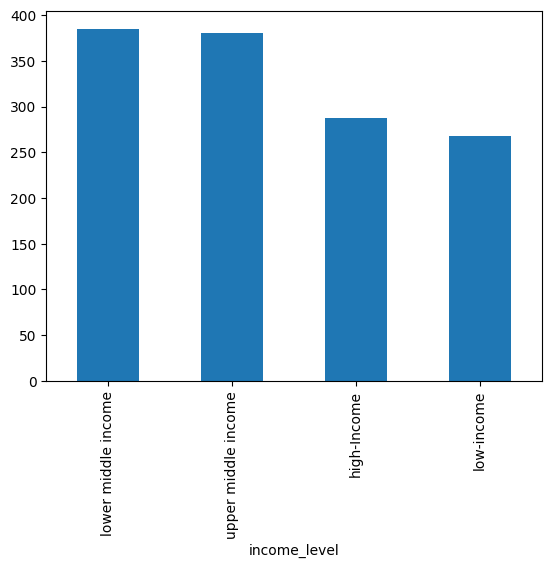

In [34]:
df['income_level'].value_counts().plot(kind='bar')

<a id='demo'></a>

# 🎬 Demo: Subsetting with Boolean Masks

We have been using Boolean masks to create new columns. We can also use them to create **subsets** – smaller versions – of a DataFrame. 

Let's say we want to get a subset of our DataFrame for years between 1962 and 1972. We would do that like this:

In [35]:
df[(df['year'] > 1962) & (df['year'] <= 1972)]

,country,year,pop,continent,lifeExp,gdpPercap,gniPercap,gdpPercap_over_800,income_level
1,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,NaN,True,low-income
2,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,NaN,False,low-income
11,Albania,1967,1984060.0,Europe,66.220,2760.196931,NaN,True,lower middle income
12,Albania,1972,2263554.0,Europe,67.690,3313.422188,NaN,True,lower middle income
21,Algeria,1967,12760499.0,Africa,51.407,3246.991771,280.0,True,lower middle income
...,...,...,...,...,...,...,...,...,...
1292,Vietnam,1972,44655014.0,Asia,50.254,699.501644,NaN,False,low-income
1301,Zambia,1967,3900000.0,Africa,47.768,1777.077318,370.0,True,lower middle income
1302,Zambia,1972,4506497.0,Africa,50.107,1773.498265,450.0,True,lower middle income
1311,Zimbabwe,1967,4995432.0,Africa,53.995,569.795071,300.0,False,low-income


<div class="alert alert-success">

## ❗ Key Points

* Booleans (`bool`) are binary variables: they can be either `True` or `False`.
* "Boolean masks" are used when we apply comparison operators such as `==` in Pandas; they allow us to retrieve data based on some condition. 
* `if` and `else` statements allow us to control whether parts of our code are being run.
* Writing a function in Python begins with the keyword `def`, followed by the function name, parameters in parentheses, and a colon.
* Functions end with a `return` statement: this is the output value of the function.
* The `.apply()` method in Pandas allows you to apply a function over the axis of a DataFrame.
    
</div>